In [2]:
from fc import *

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"



from keras import backend as K
from keras.optimizers import Adam

import tensorflow as tf

# tf.session specification
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
# config.gpu_options.per_process_gpu_memory_fraction = 0.5

# Create a session with the above options specified.
K.tensorflow_backend.set_session(tf.Session(config=config))

from PIL import Image
import numpy as np

Using TensorFlow backend.


# Import image directly from the image folder

In [3]:
data_dir_oil_wet = './data/Carbo_data_200by200/Carbo_OilWet_image_Data_200by200/'
data_dir_water_wet = './data/Carbo_data_200by200/Carbo_WaterWet_image_Data_200by200/'
num_images, dim_x = 1600, 200
data_water_wet = np.zeros((num_images, dim_x, dim_x, 3))
data_oil_wet = np.zeros((num_images, dim_x, dim_x, 3))

In [4]:
import glob
ct = 0
for fn in glob.glob(data_dir_water_wet +'*.tif'):
    data_water_wet[ct, ...] = np.array(Image.open(fn))
    ct += 1
    if ct%100 == 0:
        print(ct)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [5]:
ct = 0
for fn in glob.glob(data_dir_oil_wet +'*.tif'):
    data_oil_wet[ct, ...] = np.array(Image.open(fn))
    ct += 1
    if ct%100 == 0:
        print(ct)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [8]:
data_water_wet.shape

label_water_wet = np.zeros((num_images,2))
label_water_wet[:, 0] = 1.
label_oil_wet = np.zeros((num_images,2))
label_oil_wet[:, 1] = 1.

all_data_raw = np.append(data_water_wet, data_oil_wet, axis=0)
all_label_raw = np.append(label_water_wet, label_oil_wet, axis=0)

## Shuffle and Divide data into Train, Val, Test

In [321]:
## Shuffle and Divide Data into Train, Val, Test
np.random.seed(7)
randomize = np.array (np.arange(all_data_raw.shape[0]))
np.random.shuffle(randomize)
all_data = all_data_raw[randomize] / 255.
all_label = all_label_raw[randomize]

num_train, num_eval, num_test = 3000, 100, 100

train_data = all_data[:num_train, ...]
train_label = all_label[:num_train, :]

eval_data = all_data[num_train:(num_train+num_eval), ...]
eval_label = all_label[num_train:(num_train+num_eval):, :]

test_data = all_data[-num_test:, ...]
test_label = all_label[-num_test:, :]

print('Train Data Set',train_data.shape)
print('Validation Data Set',eval_data.shape)
print('Test Data Set', test_data.shape)

print('Train Data Label', train_label.shape)
print('Validation Data Label', eval_label.shape)
print('Test Data Label', test_label.shape)

Train Data Set (3000, 200, 200, 3)
Validation Data Set (100, 200, 200, 3)
Test Data Set (100, 200, 200, 3)
Train Data Label (3000, 2)
Validation Data Label (100, 2)
Test Data Label (100, 2)


## Option#2: Read images from Saved data from Conv_model notebook

In [322]:
#import h5py

In [323]:
#fn = h5py.File('./saved_models/rock_image_ss2_200x200_onehotlabels.h5', 'r')
#fn = h5py.File('./saved_models/rock_image_carb_200x200_onehotlabels.h5', 'r')
#train_data = np.array(fn['train'])
#train_label = np.array(fn['train_label'])
#eval_data = np.array(fn['eval'])
#eval_label = np.array(fn['eval_label'])
#test_data = np.array(fn['test'])
#test_label = np.array(fn['test_label'])
#fn.close()

In [324]:
train_data.shape

(3000, 200, 200, 3)

In [325]:
train_label.shape

(3000, 2)

### Plot images

In [326]:
import matplotlib.pyplot as plt

In [327]:
title_dict = {0.0: 'oil wet', 1.0: 'water wet'}

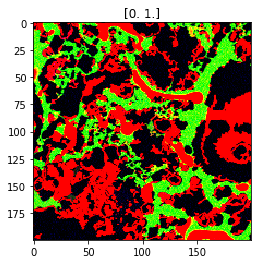

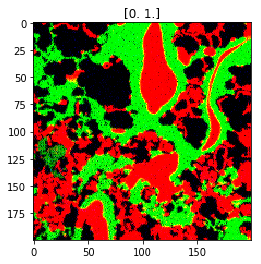

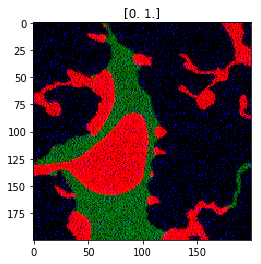

In [328]:
for k in range(20,23):
    plt.imshow(train_data[k, ...])
    plt.title(train_label[k])
    plt.show()

## Construct FC

In [329]:
dim_x = 200

In [330]:
input_shape =(dim_x, dim_x, 3)
output_dim = 2

In [331]:
fc_model = create_fc(input_shape, output_dim)

In [332]:
fc_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
fc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image (InputLayer)           (None, 200, 200, 3)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               61440512  
_________________________________________________________________
batch_normalization_29 (Batc (None, 512)               2048      
_________________________________________________________________
activation_29 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_30 (Batc (None, 256)               1024      
__________

## Train the model

In [333]:
hist = fc_model.fit(x=train_data, y=train_label, batch_size=50, epochs=20, validation_data=(eval_data, eval_label), verbose=True)

Train on 3000 samples, validate on 100 samples
Epoch 1/20
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1537 - acc: 0.9440 - val_loss: 0.0548 - val_acc: 0.9800
Epoch 2/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0577 - acc: 0.9797 - val_loss: 0.3255 - val_acc: 0.9000
Epoch 3/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0326 - acc: 0.9890 - val_loss: 0.0718 - val_acc: 0.9800
Epoch 4/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0216 - acc: 0.9917 - val_loss: 0.0115 - val_acc: 0.9900
Epoch 5/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0269 - acc: 0.9907 - val_loss: 0.0269 - val_acc: 0.9900
Epoch 6/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0114 - acc: 0.9957 - val_loss: 0.0723 - val_acc: 0.9700
Epoch 7/20
3000/3000 [==============================] - 4s 1ms/step - loss: 0.0188 - acc: 0.9930 - val_loss: 0.0186 - val_acc: 0.9900
Epoch 8/20
300

## Save trained model

In [334]:
#cnn_model.save_weights('./saved_models/cnn_carb_200x200_onehotlabel.h5')
fc_model.save_weights('./saved_models/fc_carbo_200x200_onehotlabel.h5')

## Plot the training process

In [335]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

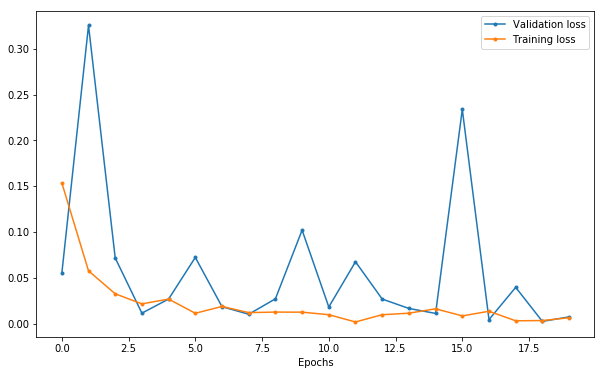

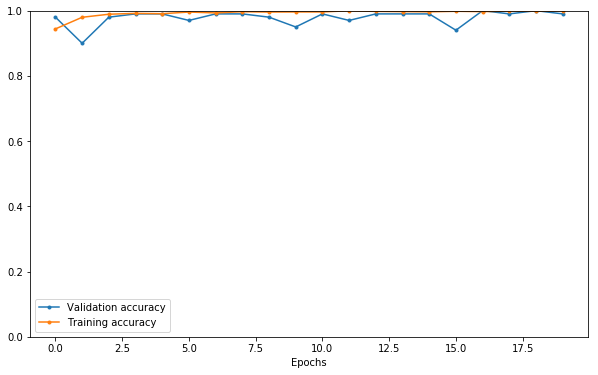

In [336]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['val_loss'], marker='.')
plt.plot(hist.history['loss'], marker='.')
plt.legend(['Validation loss', 'Training loss'])
plt.xlabel('Epochs')
#plt.ylim([0,1])
plt.figure(figsize=(10,6))
plt.plot(hist.history['val_acc'], marker='.')
plt.plot(hist.history['acc'], marker='.')
plt.ylim([0,1])
plt.xlabel('Epochs')
plt.legend(['Validation accuracy', 'Training accuracy'])
plt.show()

In [337]:
import pickle

In [338]:
#pickle.dump( hist.history, open( "saved_models/hist_conv_carb_200x200_onehot_label.pickle", "wb" ) )
pickle.dump( hist.history, open( "saved_models/hist_fc_carbo_200x200_onehot_label", "wb" ) )

#### Analyze Accuracy_Statistics

In [339]:
test_data.shape

(100, 200, 200, 3)

In [340]:
test_label.shape

(100, 2)

In [341]:
test_label_st = np.argmax(test_label, axis=1) # giving indies of max number

In [342]:
test_label_st.shape

(100,)

In [366]:
print(test_label_st) # 1 is oil-wet and 0 is water-wet

[1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0]


In [344]:
test_prob_pred = fc_model.predict(test_data)

In [345]:
test_label_pred = np.argmax(test_prob_pred, axis=1)

In [346]:
test_label_pred.shape

(100,)

In [365]:
print(test_label_pred)

[1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0]


in test_label, 0 is oil wet and 1 is water wet

##### Calculate False (Incorrect Prediction) + Positive (=waterwet)

In [348]:
test_label_water_wet = test_label_st[np.where(test_label_st==0)]
# True labels for all the actually water wet (==0) samples

In [349]:
np.where(test_label_st==0) #Indies of water-wet image in test_set data

(array([ 1,  2,  3,  4,  5,  7,  8, 10, 12, 13, 18, 19, 20, 21, 24, 27, 28,
        29, 31, 32, 33, 36, 39, 40, 41, 42, 43, 44, 45, 50, 53, 57, 58, 60,
        61, 63, 65, 67, 68, 69, 71, 72, 73, 78, 80, 82, 83, 85, 88, 89, 91,
        93, 94, 97, 98, 99]),)

In [350]:
print(test_label_water_wet.shape)

(56,)


In [351]:
test_label_water_wet_pred = test_label_pred[np.where(test_label_st==0)]
# Predicted labels for all the actually water wet samples in test set

In [367]:
false_postive_water_wet = np.sum(test_label_water_wet_pred != test_label_water_wet) / test_label_water_wet.shape[0]
true_postive_water_wet = np.sum(test_label_water_wet_pred == test_label_water_wet) / test_label_water_wet.shape[0]

In [353]:
print('True-Positive:',true_postive_water_wet, 'False-Positive:',false_postive_water_wet)

True-Positive: 0.9821428571428571 False-Positive: 0.017857142857142856


#### Calculate False (Incorrect Prediction) + Negative (=Oil-Wet)

In [354]:
test_label_oil_wet = test_label_st[np.where(test_label_st==1)]
# True labels for all the actually oil wet samples
test_label_oil_wet_pred = test_label_pred[np.where(test_label_st==1)]
# Predicted labels for all the actually oil wet samples in test set
print(test_label_oil_wet.shape)

(44,)


In [355]:
false_negative_oil_wet = np.sum(test_label_oil_wet_pred != test_label_oil_wet) / test_label_oil_wet.shape[0]
true_negative_oil_wet = np.sum(test_label_oil_wet_pred == test_label_oil_wet) / test_label_oil_wet.shape[0]
print('False-Negative:',false_negative_oil_wet,'True-Negative:',true_negative_oil_wet)
print(false_negative_oil_wet+true_negative_oil_wet)

########################
fal_neg = np.where(test_label_oil_wet_pred != test_label_oil_wet)
print(fal_neg)
false_negative = fal_neg[0]+1
print ( 'False-Negative:',false_negative)

print(test_label_st[false_negative])
print(test_label_pred[false_negative])

False-Negative: 0.0 True-Negative: 1.0
1.0
(array([], dtype=int64),)
False-Negative: []
[]
[]


# Plot the saliency map

In [356]:
from keras.losses import binary_crossentropy
import keras.backend as K

def normalize_image(x):
    return (x - x.min()) / (x.max() - x.min())

def plot_saliency_map(saliency_data, ind_correct_score):
    predicted_label = fc_model.predict(saliency_data)
    saliency = K.gradients(fc_model.output[:,ind_correct_score], fc_model.input)[0]
    saliency_evaluator = K.function([fc_model.input], [saliency], updates=None)
    saliency_map = saliency_evaluator([saliency_data])[0]
    saliency_map = np.max(saliency_map, axis=3)
#     print(saliency_data.shape)
#     print(saliency_map.shape)
#     print(ind_correct_score)
    dict_ = {0: 'water wet', 1: 'oil wet'}
    predicted_label = np.argmax(predicted_label)
    normalized_sal_map = normalize_image(saliency_map)
    normalized_sal_map = np.repeat(normalized_sal_map[:,:,:,None],3,axis=3)**1.5
    # Plot
    plt.figure(figsize=(22,9))
    plt.subplot(1,3,1)
    plt.imshow(saliency_data[0,...])
    plt.title('True label:' + dict_[ind_correct_score])
    #plt.colorbar(fraction=0.046)
    plt.subplot(1,3,2)
    plt.set_cmap('gray')
    plt.imshow(saliency_map[0,...])
    plt.title('Predicted label:' + dict_[predicted_label])
    plt.colorbar(fraction=0.046)
    plt.subplot(1,3,3)
    plt.imshow(normalize_image(normalized_sal_map[0, ...] * saliency_data[0, ...]))
    plt.show()

In [357]:
test_ind_correct_score = np.argmax(test_label, axis=1)

### Failed case Saliency Map

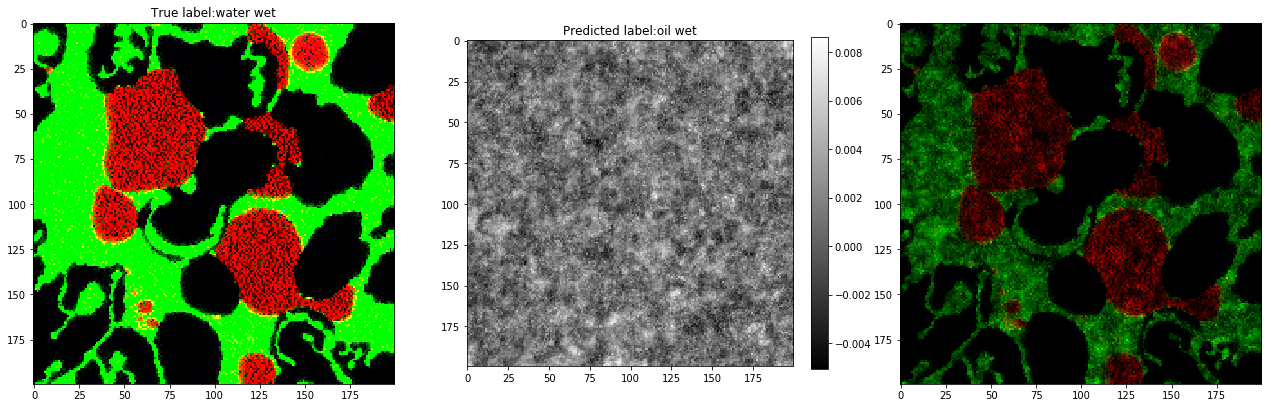

In [370]:
#Indecies of False-Positive
failure = np.where(test_label_st != test_label_pred)
fail = failure[0]
#print ( 'False-Positive:',false_positive)

for k in fail:
    plot_saliency_map(test_data[[k], ...], test_ind_correct_score[k])

### General Saliency map

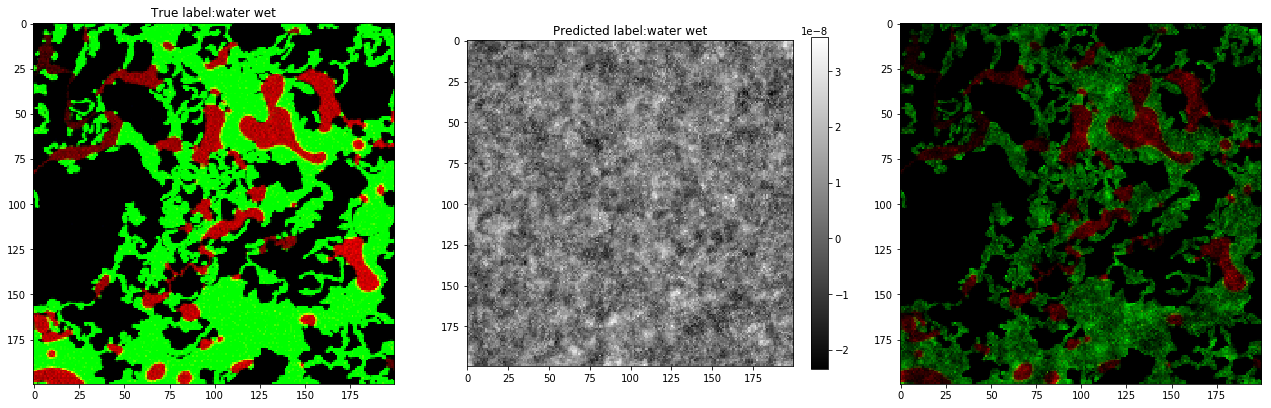

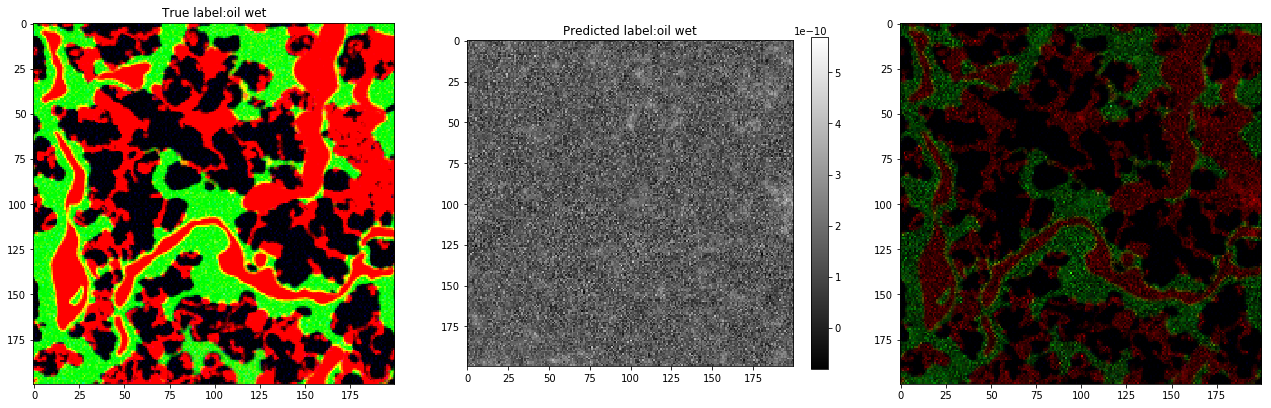

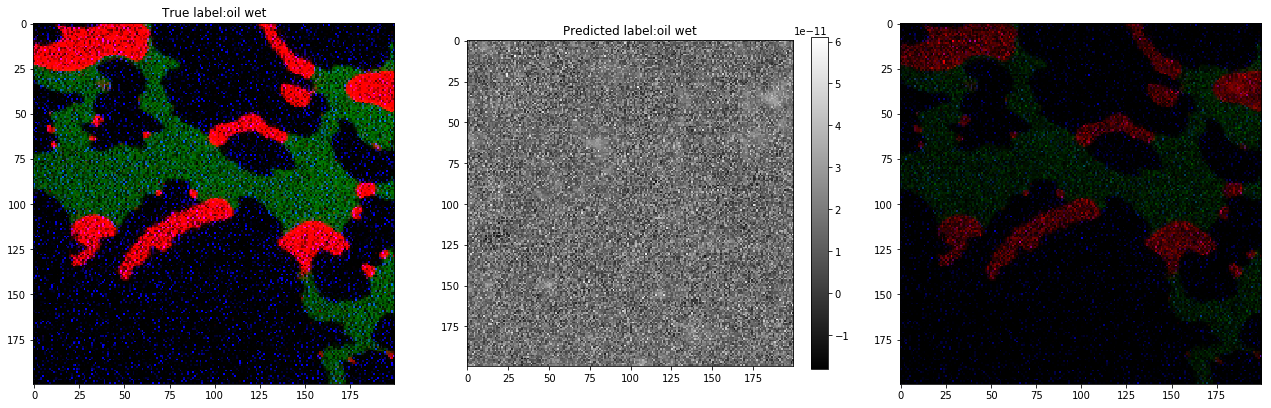

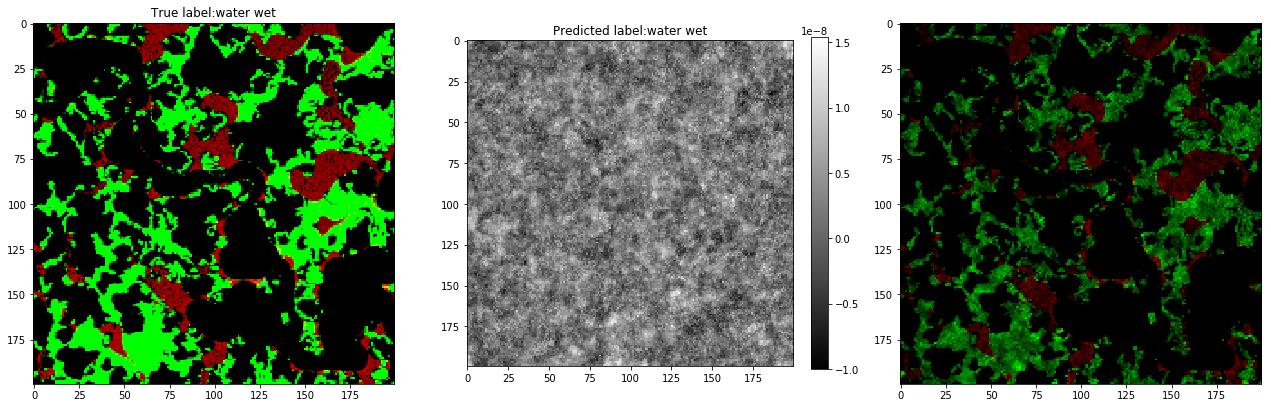

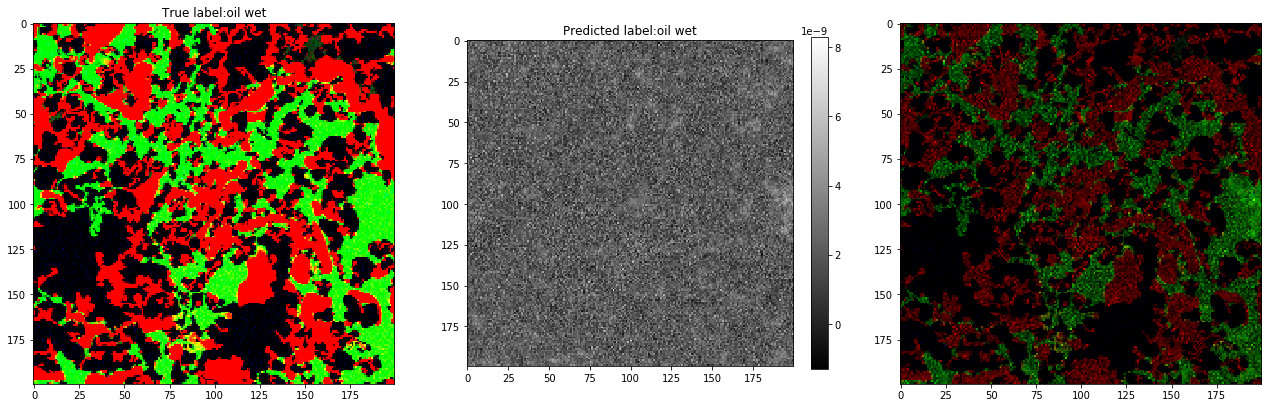

In [360]:
for k in range(50,55):
    plot_saliency_map(test_data[[k], ...], test_ind_correct_score[k])